In [159]:
# import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy
import requests
import time 
from datetime import datetime

#import linear regression from the SciPy stats module 
from scipy.stats import linregress

from config import weather_api_key 

In [2]:
# create a set of random latitude and longtitude combinations 
lats = np.random.uniform( low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform( low = -90.000, high = 90.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list - unzip lat_lngs 
coordinates = list(lat_lngs)

In [4]:
# create a list for holding the cities 
cities = [] 

# identify the nearest city for each latitude and longtitude combinations 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list 
    if city not in cities: 
        cities.append(city)

#print the city count to confirm sufficient count 
len(cities)

611

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# create an empty list to hold the weather data 
city_data = [] 

#print the beginning of the logging 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters 
record_count = 1 
set_count = 1 

# loop through all the cities in our list 
for i, city in enumerate(cities): 
    # group cities in sets of 50 for logging purposes 
    if (i % 50 == 0 and i >= 50 ): 
        set_count += 1 
        record_count = 1 
    
    # create endpoint URL with each city 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count 
    record_count +=1 
    
#run an API request for each of the cities. 
    try: 
        #parse the JSON and retreive data 
        city_weather = requests.get(city_url).json()

        #parse out the needed data 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #convert the date to ISO standard 
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city information into city_data list 
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max_Temp": city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country":city_country,
                         "Date": city_date})

    #If an error is experienced, skip the city
    except: 
        print("City not found. Skipping.....")
        pass 

#Indicate that Data Loading is complete. 
print("-----------------------------")
print("Data Retreival Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | oistins
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping.....
Processing Record 6 of Set 1 | alta floresta
Processing Record 7 of Set 1 | iaciara
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping.....
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | calvia
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | santo domingo
Processing Record 14 of Set 1 | kinshasa
Processing Record 15 of Set 1 | sao joao del rei
Processing Record 16 of Set 1 | bonthe
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | urdzhar
City not found. Skipping.....
Processing Record 19 of Set 1 | sassandra
Processing Record 20 of Set 1 | taolanaro
Cit

Processing Record 181 of Set 4 | nicoya
Processing Record 182 of Set 4 | poole
Processing Record 183 of Set 4 | cayenne
Processing Record 184 of Set 4 | sikasso
Processing Record 185 of Set 4 | calama
Processing Record 186 of Set 4 | afua
Processing Record 187 of Set 4 | bonavista
Processing Record 188 of Set 4 | lesnoye
Processing Record 189 of Set 4 | veraval
Processing Record 190 of Set 4 | bur gabo
City not found. Skipping.....
Processing Record 191 of Set 4 | conop
Processing Record 192 of Set 4 | ponta do sol
Processing Record 193 of Set 4 | pemba
Processing Record 194 of Set 4 | codrington
Processing Record 195 of Set 4 | colesberg
Processing Record 196 of Set 4 | sinkat
City not found. Skipping.....
Processing Record 197 of Set 4 | port elizabeth
Processing Record 198 of Set 4 | kudymkar
Processing Record 199 of Set 4 | wahran
City not found. Skipping.....
Processing Record 200 of Set 4 | marv dasht
City not found. Skipping.....
Processing Record 201 of Set 5 | itupiranga
Proce

Processing Record 363 of Set 8 | mahibadhoo
Processing Record 364 of Set 8 | calbuco
Processing Record 365 of Set 8 | saint george
Processing Record 366 of Set 8 | zurrieq
Processing Record 367 of Set 8 | ovalle
Processing Record 368 of Set 8 | hella
Processing Record 369 of Set 8 | melo
Processing Record 370 of Set 8 | kudahuvadhoo
Processing Record 371 of Set 8 | vestmannaeyjar
Processing Record 372 of Set 8 | pokhara
Processing Record 373 of Set 8 | kamariotissa
Processing Record 374 of Set 8 | dalbandin
Processing Record 375 of Set 8 | maragogi
Processing Record 376 of Set 8 | solsvik
City not found. Skipping.....
Processing Record 377 of Set 8 | brae
Processing Record 378 of Set 8 | karaul
City not found. Skipping.....
Processing Record 379 of Set 8 | kharp
Processing Record 380 of Set 8 | nouadhibou
Processing Record 381 of Set 8 | mahajanga
Processing Record 382 of Set 8 | kangasala
Processing Record 383 of Set 8 | yangambi
Processing Record 384 of Set 8 | alto araguaia
Processi

Processing Record 547 of Set 11 | laguna
Processing Record 548 of Set 11 | channel-port aux basques
Processing Record 549 of Set 11 | bam
Processing Record 550 of Set 11 | san joaquin
Processing Record 551 of Set 12 | muravlenko
Processing Record 552 of Set 12 | bria
Processing Record 553 of Set 12 | glens falls
Processing Record 554 of Set 12 | shieli
Processing Record 555 of Set 12 | forestville
Processing Record 556 of Set 12 | karpogory
Processing Record 557 of Set 12 | parchim
Processing Record 558 of Set 12 | sur
Processing Record 559 of Set 12 | finote selam
Processing Record 560 of Set 12 | guadalupe
Processing Record 561 of Set 12 | kyshtovka
Processing Record 562 of Set 12 | la palma
Processing Record 563 of Set 12 | lisakovsk
Processing Record 564 of Set 12 | makurdi
Processing Record 565 of Set 12 | novorozhdestvenskaya
Processing Record 566 of Set 12 | wanlaweyn
Processing Record 567 of Set 12 | akdagmadeni
Processing Record 568 of Set 12 | meulaboh
Processing Record 569 o

In [57]:
# convert the array of dictionaries to a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,74.79,86,97,13.78,RE,2022-04-04 02:21:58
1,Busselton,-33.6500,115.3333,68.63,52,15,14.54,AU,2022-04-04 02:21:33
2,Oistins,13.0667,-59.5333,78.89,69,40,18.41,BB,2022-04-04 02:25:44
3,Margate,51.3813,1.3862,40.69,70,98,5.99,GB,2022-04-04 02:27:44
4,Alta Floresta,-9.8756,-56.0861,71.69,96,100,1.19,BR,2022-04-04 02:23:07
5,Iaciara,-14.0958,-46.6317,73.90,48,35,3.31,BR,2022-04-04 02:27:44
6,Bandarbeyla,9.4942,50.8122,75.69,82,6,2.53,SO,2022-04-04 02:21:42
7,Georgetown,5.4112,100.3354,84.13,82,20,6.91,MY,2022-04-04 02:21:48
8,Calvia,39.5657,2.5062,49.91,59,100,17.54,ES,2022-04-04 02:27:45
9,Dikson,73.5069,80.5464,2.34,94,81,9.71,RU,2022-04-04 02:21:55


In [58]:

city_data_df = city_data_df.reindex(columns = ['City','Country','Date','Lat','Lng','Max_Temp',
                                     'Humidity',"Cloudiness","Wind Speed"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-04-04 02:21:58,-21.3585,55.7679,74.79,86,97,13.78
1,Busselton,AU,2022-04-04 02:21:33,-33.6500,115.3333,68.63,52,15,14.54
2,Oistins,BB,2022-04-04 02:25:44,13.0667,-59.5333,78.89,69,40,18.41
3,Margate,GB,2022-04-04 02:27:44,51.3813,1.3862,40.69,70,98,5.99
4,Alta Floresta,BR,2022-04-04 02:23:07,-9.8756,-56.0861,71.69,96,100,1.19
5,Iaciara,BR,2022-04-04 02:27:44,-14.0958,-46.6317,73.90,48,35,3.31
6,Bandarbeyla,SO,2022-04-04 02:21:42,9.4942,50.8122,75.69,82,6,2.53
7,Georgetown,MY,2022-04-04 02:21:48,5.4112,100.3354,84.13,82,20,6.91
8,Calvia,ES,2022-04-04 02:27:45,39.5657,2.5062,49.91,59,100,17.54
9,Dikson,RU,2022-04-04 02:21:55,73.5069,80.5464,2.34,94,81,9.71


In [59]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [61]:
# extract relevant fields from the DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df['Max_Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

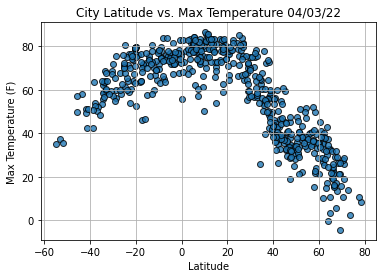

In [67]:
# build the scatter plot for latitude cs. max temperature 
plt.scatter(lats, max_temps, edgecolor = 'black', linewidths = 1,
            marker ='o', alpha = 0.8, label = 'Cities')

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig1.png")

plt.show() 

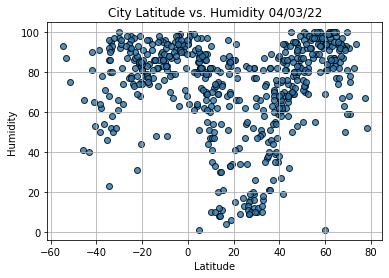

In [68]:
# build the scatter plot for latitude cs. max temperature 
plt.scatter(lats, humidity, edgecolor = 'black', linewidths = 1,
            marker ='o', alpha = 0.8, label = 'Cities')

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig2.png")

plt.show() 

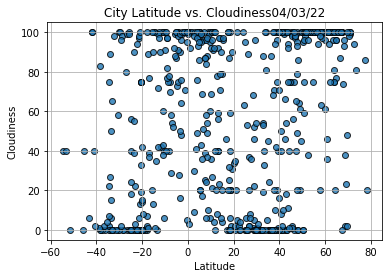

In [69]:
# build the scatter plot for latitude cs. max temperature 
plt.scatter(lats, cloudiness, edgecolor = 'black', linewidths = 1,
            marker ='o', alpha = 0.8, label = 'Cities')

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime('%x'))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig3.png")

plt.show() 

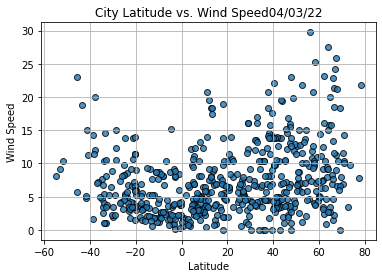

In [70]:
# build the scatter plot for latitude cs. max temperature 
plt.scatter(lats, wind_speed, edgecolor = 'black', linewidths = 1,
            marker ='o', alpha = 0.8, label = 'Cities')

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime('%x'))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig4.png")

plt.show() 

In [146]:
def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):
    # perform linear regression 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #calculate the regression line y values from the slope and intercept 
    regress_values = x_values * slope + intercept 

    #get the equation of the line 
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    #create a scatter plot of the x and y values 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    
    #annotate the text for the line equation 
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show() 

In [147]:
northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df[(city_data_df["Lat"]< 0)]

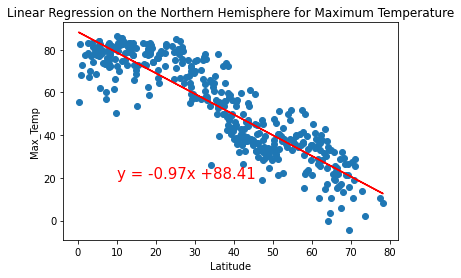

In [148]:
# linear regression on the northern hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max_Temp']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature"
                      , 'Max_Temp', (10,20))

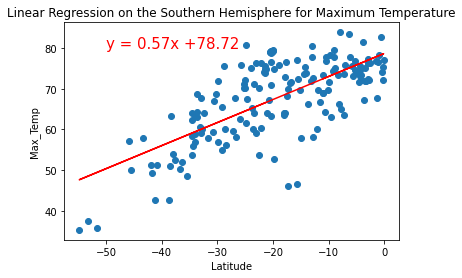

In [149]:
# linear regression on the southern hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max_Temp']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature"
                      , 'Max_Temp', (-50,80))

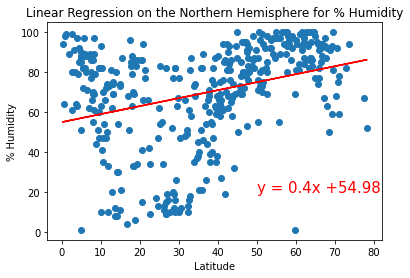

In [150]:
# linear regression on the northern hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity"
                      , '% Humidity', (50,20))

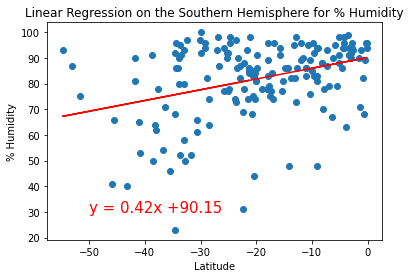

In [151]:
# linear regression on the northern hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Humidity"
                      , '% Humidity', (-50,30))

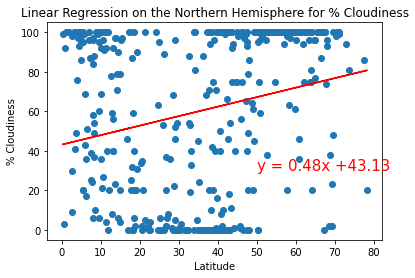

In [152]:
# linear regression on the northern hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness"
                      , '% Cloudiness', (50,30))

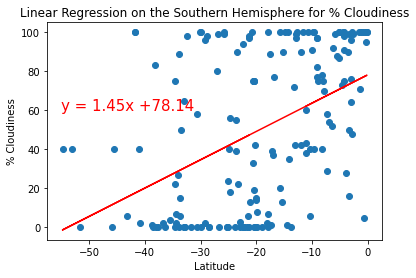

In [153]:
# linear regression on the northern hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Cloudiness"
                      , '% Cloudiness', (-55,60))

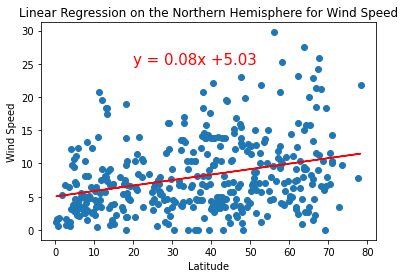

In [154]:
# linear regression on the northern hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed"
                      , 'Wind Speed', (20,25))

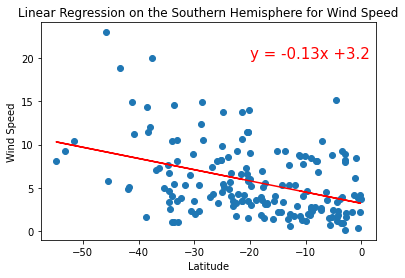

In [155]:
# linear regression on the northern hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed"
                      , 'Wind Speed', (-20,20))